# Reference
- https://www.kaggle.com/allunia/shaking-earth

In [5]:
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 1000)

In [6]:
ROOT_PATH = Path().absolute().parents[1]
display(ROOT_PATH)

PosixPath('/Users/berry/Kaggle/earthquake')

## Train

In [21]:
train_df = pd.read_csv(ROOT_PATH / "input" / "train.csv", nrows=10000000, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})

In [10]:
train_df.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


- `accoustic_data`:  地震波のsignal 
- `time_to_failure`: 地震が起きるまでの時間

In [5]:
for n in range(10):
    print(train_df["time_to_failure"].values[n])

1.4690999832
1.4690999821000001
1.4690999809999998
1.4690999799000002
1.4690999787999999
1.4690999777
1.4690999766
1.4690999755
1.4690999744
1.4690999733


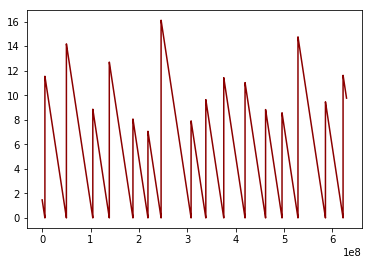

In [6]:
plt.plot(train_df.index.values, train_df["time_to_failure"].values, c="darkred")
plt.show()

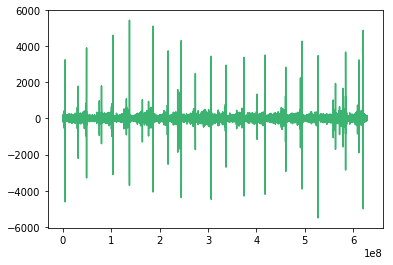

In [7]:
plt.plot(train_df.index.values, train_df["acoustic_data"].values, c="mediumseagreen")
plt.show()

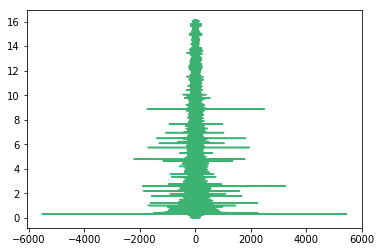

In [9]:
plt.plot(train_df["acoustic_data"].values, train_df["time_to_failure"].values, c="mediumseagreen")
plt.show()

First 50000 indices

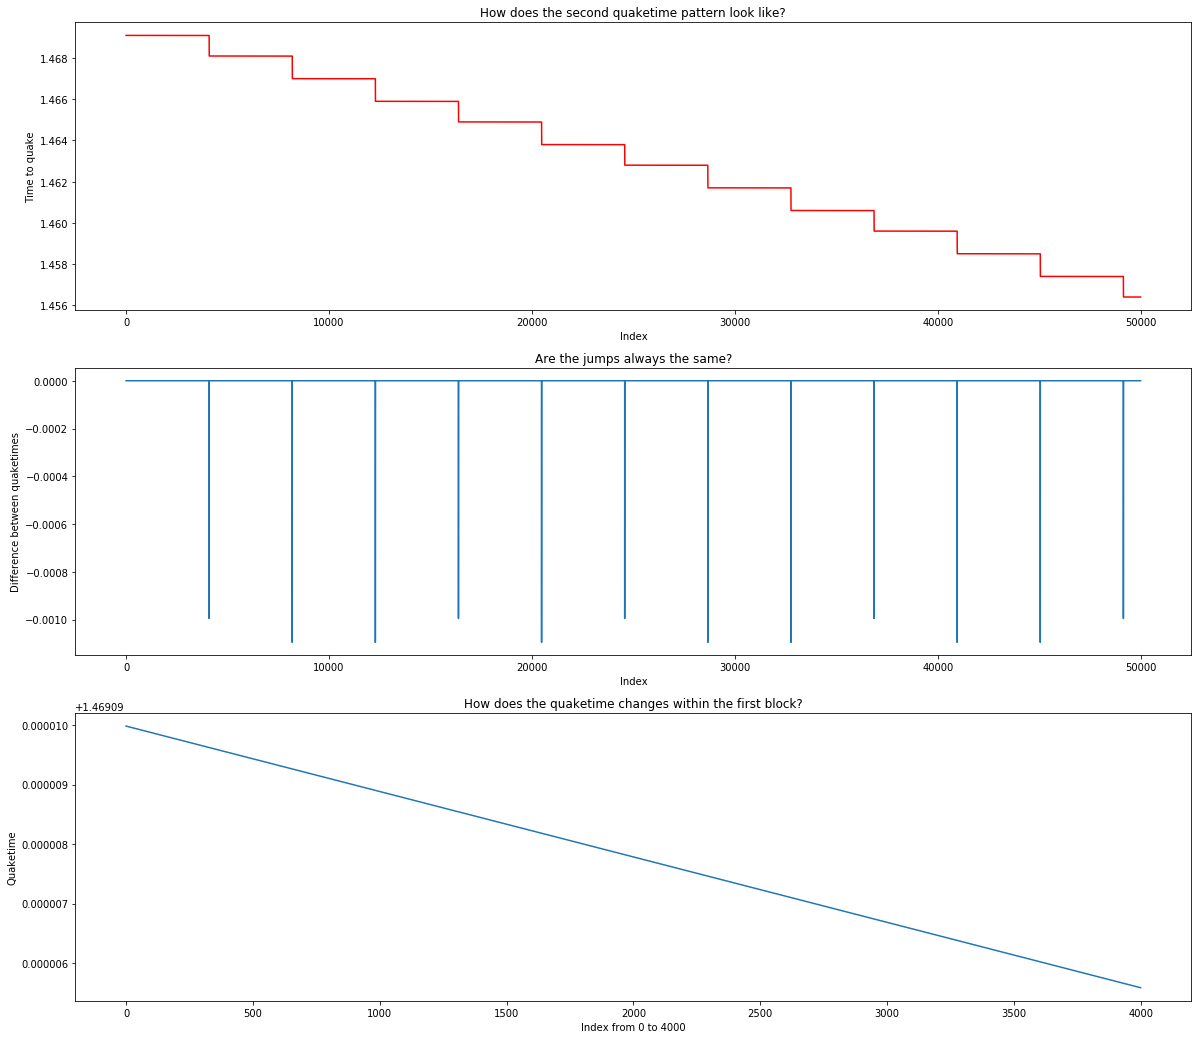

In [15]:
fig, ax = plt.subplots(3,1,figsize=(20,18))
ax[0].plot(train_df.index.values[0:50000], train_df["time_to_failure"].values[0:50000], c="Red")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Time to quake")
ax[0].set_title("How does the second quaketime pattern look like?")
ax[1].plot(train_df.index.values[0:49999], np.diff(train_df["time_to_failure"].values[0:50000]))
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Difference between quaketimes")
ax[1].set_title("Are the jumps always the same?")
ax[2].plot(train_df.index.values[0:4000], train_df["time_to_failure"].values[0:4000])
ax[2].set_xlabel("Index from 0 to 4000")
ax[2].set_ylabel("Quaketime")
ax[2].set_title("How does the quaketime changes within the first block?");

- The first plot shows that the quaketime seems to stay almost constant up to index 4000. Then a steep decrease occurs. Afterwards this kind of pattern is repeated.
- The second plot reveals that the second jump of the quaketime is larger than the first.
- The third plot shows that the quaketime within such a "constant" block is not really constant but linear decreasing even though with very small numbers.

### First conclusion
Thank you to @pete who pointet out that there are 16 earthquakes in the train set and that they really occur when quaketime goes to 0. It's still interesting why we have several blocks and jumps of quaketime on low resolution where the time decreases linear with a very small stepsize.

Currently I'm not sure why these jumps between our target quaketime occur between values with only small scaled differences. What do you think? Let's me know if you like in the commets ;-)

Ok, I feel more familiar with the train data right now. Let's turn to the test data before switching to more explorations.

## Test

In [16]:
test_path = ROOT_PATH / "input" / "test"

In [24]:
test_files = list(test_path.glob("*"))

In [26]:
len(test_files)

2624

In [29]:
test_0 = pd.read_csv(test_files[0], dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})

In [32]:
test_0

,acoustic_data
0,2
1,6
2,5
3,6
4,9
5,9
6,7
7,8
8,3
9,1


## Sample Submission

In [34]:
sample_df = pd.read_csv(ROOT_PATH / "input" / "sample_submission.csv", dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})
sample_df.head(5)

,seg_id,time_to_failure
0,seg_00030f,0.0
1,seg_0012b5,0.0
2,seg_00184e,0.0
3,seg_003339,0.0
4,seg_0042cc,0.0


In [35]:
len(sample_df)

2624

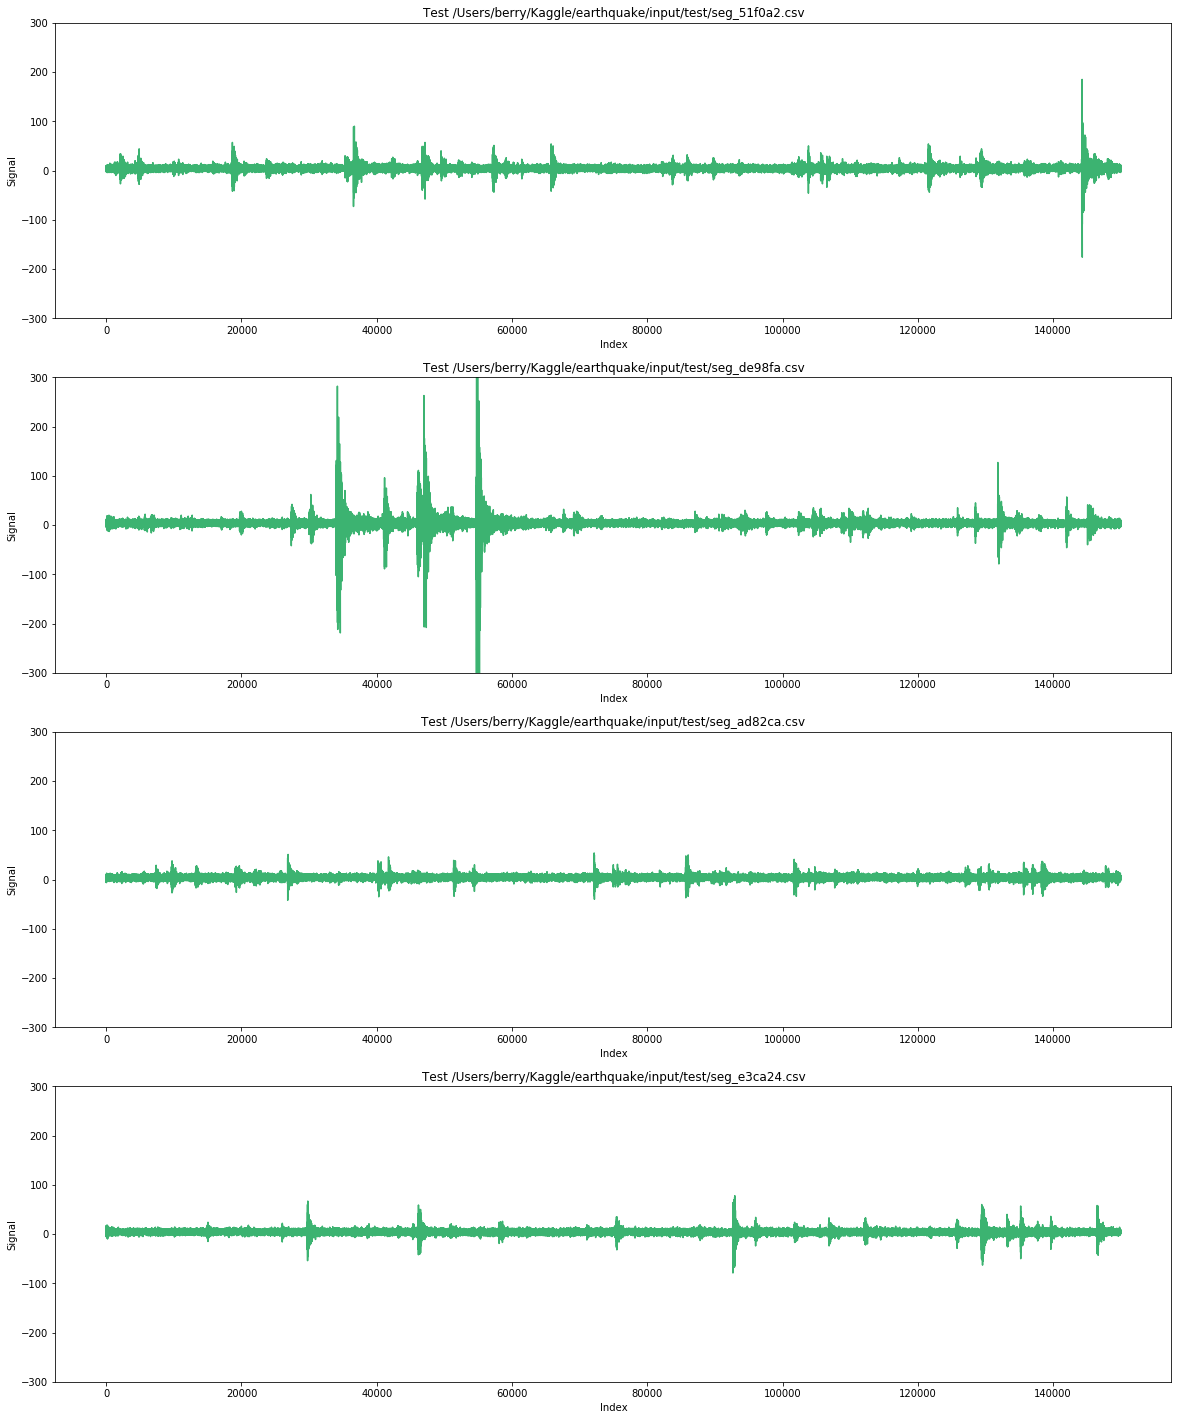

In [37]:
fig, ax = plt.subplots(4,1, figsize=(20,25))

for n in range(4):
    seg = pd.read_csv(test_files[n])
    ax[n].plot(seg.acoustic_data.values, c="mediumseagreen")
    ax[n].set_xlabel("Index")
    ax[n].set_ylabel("Signal")
    ax[n].set_ylim([-300, 300])
    ax[n].set_title("Test {}".format(test_files[n]));

Questions for the train set
- Why do we have this low resolution jumps and why are they different? Is there some periodicity that may correlate with the signal? Would it be helpful to reconstruct that for test segments?
- Why do we only have 16 earthquakes and such a high resolution of signal inbetween?

Questions for the test set
- Are all segments of the test set of the same length?
- Are they similar in their distributions or in the strength and time period between strong peaks?
- Can we find some groups of similar test set segments?

Train Distribution

In [39]:
train_df.describe()

,acoustic_data,time_to_failure
count,6.291455e+08,6.291455e+08
mean,4.519468e+00,5.678292e+00
std,1.073571e+01,3.672697e+00
min,-5.515000e+03,9.550396e-05
25%,2.000000e+00,2.625997e+00
50%,5.000000e+00,5.349798e+00
75%,7.000000e+00,8.173396e+00
max,5.444000e+03,1.610740e+01


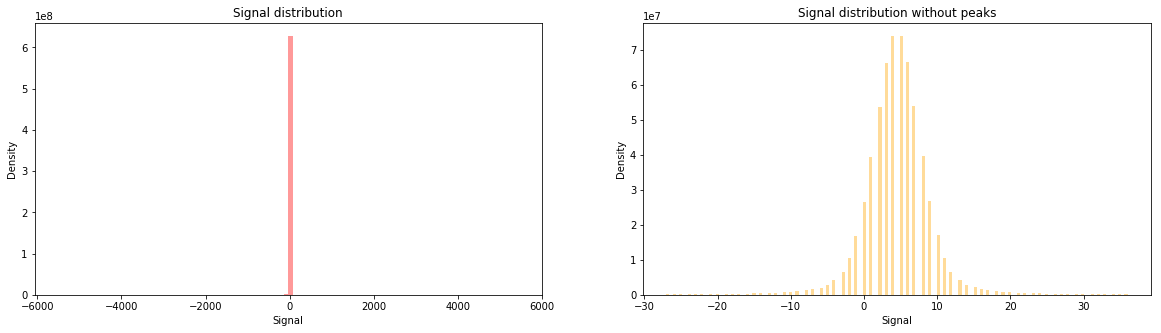

In [40]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.distplot(train_df["acoustic_data"].values, ax=ax[0], color="Red", bins=100, kde=False)
ax[0].set_xlabel("Signal")
ax[0].set_ylabel("Density")
ax[0].set_title("Signal distribution")

low = train_df["acoustic_data"].mean() - 3 * train_df["acoustic_data"].std()
high = train_df["acoustic_data"].mean() + 3 * train_df["acoustic_data"].std() 
sns.distplot(train_df.loc[(train_df["acoustic_data"] >= low) & (train_df["acoustic_data"] <= high), "acoustic_data"].values,
             ax=ax[1],
             color="Orange",
             bins=150, kde=False)
ax[1].set_xlabel("Signal")
ax[1].set_ylabel("Density")
ax[1].set_title("Signal distribution without peaks");

左: すべての分布 -> 地震によって大きな外れ値が発生する

右: 3σ外除去 -> 中央値と平均は`4`付近にあり，Gaussian分布に近い見た目

前後のデータでttfの差分を見てみる

In [22]:
stepsize = np.diff(train_df["time_to_failure"])
train_df.drop(train_df.index[len(train_df)-1], inplace=True)
train_df["stepsize"] = stepsize
train_df.head(5)

,acoustic_data,time_to_failure,stepsize
0,12,1.4691,-1.100000e-09
1,6,1.4691,-1.100000e-09
2,8,1.4691,-1.100000e-09
3,5,1.4691,-1.100000e-09
4,8,1.4691,-1.100000e-09


In [23]:
train_df["stepsize"] = train_df["stepsize"].apply(lambda l: np.round(l, 10))

In [24]:
stepsize_counts = train_df["stepsize"].value_counts()
stepsize_counts

-1.100000e-09    5655193
-1.000000e-09    3907598
-2.000000e-09     434767
-1.095496e-03        882
-1.095495e-03        679
-9.954955e-04        497
-9.954950e-04        381
-1.095497e-03          1
 1.154000e+01          1
Name: stepsize, dtype: int64